# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. 

In [1]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1.1 (4pt)
What was the mean finishing time in the random sample?

In [2]:
dfSample = pd.read_csv('run10sample.csv')
dfSample

,place,time,pace,age,gender,location,state,divPlace,divTot
0,4494,92.25,9.225,38.0,M,Chesapeake Beach MD,MD,690.0,1093.0
1,6298,106.35,10.635,33.0,M,Washington DC,DC,1322.0,1490.0
2,2502,89.33,8.933,55.0,F,McLean VA,VA,37.0,236.0
3,8176,113.50,11.350,24.0,F,Alexandria VA,VA,878.0,974.0
4,3413,86.52,8.652,54.0,M,San Francisco CA,CA,213.0,483.0
5,8008,112.30,11.230,42.0,F,Chevy Chase MD,MD,785.0,974.0
6,8791,118.45,11.845,36.0,F,Fairfax VA,VA,1215.0,1367.0
7,3987,95.17,9.517,25.0,F,Arlington VA,VA,1230.0,2782.0
8,3451,93.25,9.325,25.0,F,Philadelphia PA,PA,1074.0,2782.0
9,1046,72.37,7.237,43.0,M,Pasadena MD,MD,111.0,931.0


In [3]:
dfSample['time'].mean()

np.float64(98.1504)

### Question 1.2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [4]:
groupedGenderS = dfSample.groupby(dfSample['gender']).size()
groupedGenderS
# alternatively, you could use count instead of size
# groupedGenderS = dfSample.groupby(dfSample['gender']).count()
# groupedGenderS

gender
F    14
M    11
dtype: int64

### Question 1.3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [5]:
meanFTimeSample = dfSample['time'].groupby(dfSample['gender']).mean()
meanFTimeSample

gender
F    103.496429
M     91.346364
Name: time, dtype: float64

## Task 2: Resampling from the population (42 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 2.1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [6]:
df = pd.read_csv('run10.csv')
meanFTime = df['time'].mean()
print(f'the mean finishing time of the population was {meanFTime:.3f}')

the mean finishing time of the population was 94.516


In [7]:
# to see whether the difference can be explained by the differences in gender distribution between the sample
# and the population, we will calculate the proportion of male and female runners
dfByGenderP = df['time'].groupby(df['gender'])
dfByGenderS = dfSample['time'].groupby(dfSample['gender'])
print('********** total number of male and female runners in the population **********')
print(dfByGenderP.count(), '\n')
print('********** total number of male and female runners in the sample **********')
print(dfByGenderS.count(), '\n')

## calculating the total number of runners in the population and the sample
### Alternatively, you could just calculate the ratio of the female runners in both the population and the sample
### by using the outputs of the groupby (as printed in the output)
totalNP = (dfByGenderP.get_group('F').count()) + (dfByGenderP.get_group('M').count())
totalNS = (dfByGenderS.get_group('F').count()) + (dfByGenderS.get_group('M').count())
print(f'The total number of runners in the population is {totalNP}')
print(f'The total number of runners in the sample is {totalNS}\n')

## calculating female and male proportions in the population and the sample
### population
fRatioP = (dfByGenderP.get_group('F').count())/totalNP
print(f'The female ratio in the population is {fRatioP:.4f}')

### sample
fRatioS = (dfByGenderS.get_group('F').count())/totalNS
print(f'The female ratio in the sample is {fRatioS:.4f}\n')


# to see whether the difference can be explained by the differences in age distribution between the sample
# and the population, we will calculate the mean age for the population and the sample
print(f'the mean age of the runners in the population is {df.age.mean():.3f}')
print(f'the mean age of the runners in the sample is {dfSample.age.mean():.3f}\n')

********** total number of male and female runners in the population **********
gender
F    9732
M    7191
Name: time, dtype: int64 

********** total number of male and female runners in the sample **********
gender
F    14
M    11
Name: time, dtype: int64 

The total number of runners in the population is 16923
The total number of runners in the sample is 25

The female ratio in the population is 0.5751
The female ratio in the sample is 0.5600

the mean age of the runners in the population is 35.521
the mean age of the runners in the sample is 37.040



> The mean finishing time of the population and the sample are 94.516 and 98.1504, respectively. So the mean finishing time of the sample is ~3.63 higher that that of the population. We can see that the proportion of women in the population and the sample are roughly the same. On the other hand, the mean age of runners in the sample is about 1.52 years higher than that of the population. So we can conclude that the differences in the age distribution can explain the difference between the mean finishing times of the sample and the population, since older people tend to run slower. To improve the estimates, we probably should have used a stratifed sample to make the gender distribution and the age distribution equal to the population.

### Question 2.2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.
In this task we will use the bootstrap function to resample from the population. 

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistic (i.e. the bootstrap sample)

Hints: 
- You can use np.random.choice to draw a sample (with or without replacement) from a data series 

In [8]:
def bootstrap(data, N, fcn, numIter = 1000):
    stats = np.array(range(numIter), dtype = 'float64') ## initializing the stats array (the function output)
    stats = np.array(range(numIter),dtype = 'float64')
    for i in range(numIter):
        sample=np.random.choice(data,N, replace = True)
        stats[i]=fcn(sample)
    return stats
# alternatively, using a while loop, the function would look like this:
#def bootstrap(data,N,fcn,numIter=1000):
#    it = 0 ## setting the iteration variable to zero. It will be increased each time a loop is executed
#    while it < numIter:
#        sample = np.random.choice(data, size = N, replace = True) ## Generates a random sample from a given 1-D array
#        stats[it] = fcn(sample)
#        it = it + 1
#    return stats


### Question 2.3 (8pt)
Call the bootstrap function from Question 2 with the finishing time of whole population as the data series, mean as the statistic, and a sample size of 25. This will give you a sampling distribution. Plot a histogram of the sampling distribution – make sure your x-axis and y-axis are labeled and a caption added. Report the mean and the standard deviation of the sampling distribution. 

Written answer: 
Is the mean of the sampling distribution close to the mean of the population? Why? 
Is the standard deviation close of the sampling distribution to the standard deviation of the population? Why not?

Sample distribution mean: 94.460

the standard deviation of the sample distribution is 3.218


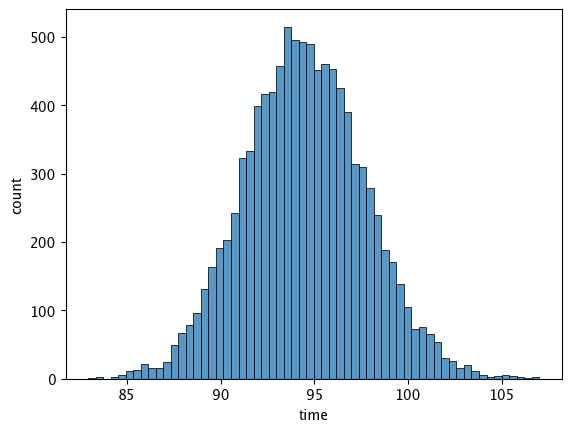

In [9]:
# setting the input values to the bootstrap function
fTime = df['time'] ## the data array
N     = 25         ## the sample size
fcn   = np.mean    ## the function that will return the stats needed

statDist = bootstrap(fTime, N, fcn, numIter = 10000)

# plotting the histogram using seaborn
# Alternatively, you could use plt.hist or sns.displot
fig = plt.figure()
sns.histplot(statDist)
plt.xlabel('time')
plt.ylabel('count')

# calculate the mean and standard deviation of the distribution
print(f'Sample distribution mean: {statDist.mean():.3f}\n')
print(f'the standard deviation of the sample distribution is {statDist.std():.3f}' % statDist.std())

Is the mean of the sampling distribution close to the mean of the population? Why? 

When we resample from the population many times, the mean of the sampling distribution will be very close to the population mean.

Is the standard deviation close of the sampling distribution to the standard deviation of the population? Why not?

The standard deviation of the sampling distribution will be smaller than the standard deviation of the population by factor sqrt(sample_size). 

*Figure 1.* The histogram showing the distribution of bootstrap means

### Question 2.4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the sampling distribution changes most and why? 

In [10]:
# calculating the mean of the distribution using sample size of 50
statDist50 = bootstrap(fTime, 50, fcn, numIter = 1000)
statMean50 = statDist50.mean()
statStd50  = statDist50.std()
print(f'The mean of the mean distribution using sample size of 50 is {statMean50:.3f}' )
print(f'The std of the mean distribution using sample size of 50 is {statStd50:.3f}')

# calculating the mean of the distribution using sample size of 100
statDist100 = bootstrap(fTime, 100, fcn, numIter = 1000)
statMean100 = statDist100.mean()
statStd100  = statDist100.std()
print(f'The mean of the mean distribution using sample size of 100 is {statMean100:.3f}')
print(f'The std of the mean distribution using sample size of 100 is {statStd100:.3f}')

The mean of the mean distribution using sample size of 50 is 94.525
The std of the mean distribution using sample size of 50 is 2.269
The mean of the mean distribution using sample size of 100 is 94.526
The std of the mean distribution using sample size of 100 is 1.571


> The mean of the distribution stays roughly the same (close to the population mean). However, the standard deviation decreases as we increase the sample size. That's because by increasing the sample size, we are including more data points in out estimates, hence the standard deviation of the stat decreases.

### Question 2.5 (6pt)
Calculate the predicted standard error of the sample mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [11]:
sd = df['time'].std()
print(f'The predicted SEM for N=25 samples is {sd/np.sqrt(25):.3f}')
print(f'The predicted SEM for N=50 samples is {sd/np.sqrt(50):.3f}')
print(f'The predicted SEM for N=100 samples is {sd/np.sqrt(100):.3f}')

The predicted SEM for N=25 samples is 3.184
The predicted SEM for N=50 samples is 2.252
The predicted SEM for N=100 samples is 1.592


> The predicted SEMs very tightly match ones obtained by resampling from the population. 

## Task 3: Calculating confidence intervals (24pt) 
### Question 3.1 (8pt)
Write a function (confidenceInt) that constructs a confidence interval from sampling distribution using the percentile method (see lecture). 	

Input arguments 
- data: Sample of estimates – usually this is output from a resampling or bootstrap function (from task 2 Q2)
- prec: What Confidence interval in percent? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [12]:
def confidenceInt(data, prec):
    lp = (100 - prec)/2
    Int = [np.percentile(data, lp), np.percentile(data, 100-(lp/2))]
    return Int

### Question 3.2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25? Use your bootstrap function (from Task 2.2) to resample 1000 artificial samples of 25 from your population. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [13]:
sampleDist = bootstrap(df['time'], 25, np.mean, numIter = 1000)
ci = confidenceInt(sampleDist, 95)
ci

[np.float64(88.60279000000001), np.float64(101.29012)]

### Question 3.3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

Text(0, 0.5, 'frequency')

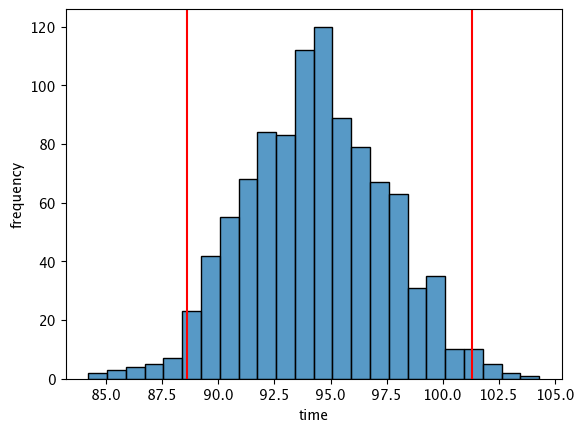

In [14]:
fig = plt.figure()
sns.histplot(sampleDist)
plt.axvline(x = ci[0], color = 'r')
plt.axvline(x = ci[1], color = 'r')
plt.xlabel('time')
plt.ylabel('frequency')

*Figure 2.* sampling distribution of the mean calculated using resampling, with sample sizes of 25. The upper bound and lower bounds of the 95% confidence interval are shown in red vertical lines

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 4.1 (8pt)
Load the sample stored in run10sample.csv. Now call the bootstrap function with the sample data. In each loop the function should resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [15]:
dfSample = pd.read_csv('run10Sample.csv')

# using bootstrap to estimate the sampling distribution
statDistSample = bootstrap(dfSample['time'], 25, np.mean, numIter = 1000)

# calculating the mean and standard deviation of the sampling distribution
statDistSampleMean = statDistSample.mean()
statDistSampleStd  = statDistSample.std()
statDistSampleCi   = confidenceInt(statDistSample, 95)

## reporting mean, std and confidence interval
print(f'the estimated mean of the sample distribution is {statDistSampleMean:.3f}')
print(f'the estimated std of the sample distribution is {statDistSampleStd:.3f}')
print(f'the 95% confidence interval is {statDistSampleCi}')

the estimated mean of the sample distribution is 98.103
the estimated std of the sample distribution is 2.710
the 95% confidence interval is [np.float64(92.5108), np.float64(104.145555)]


### Question 4.2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels. 

Text(5.069444444444445, 0.5, 'frequency')

<Figure size 640x480 with 0 Axes>

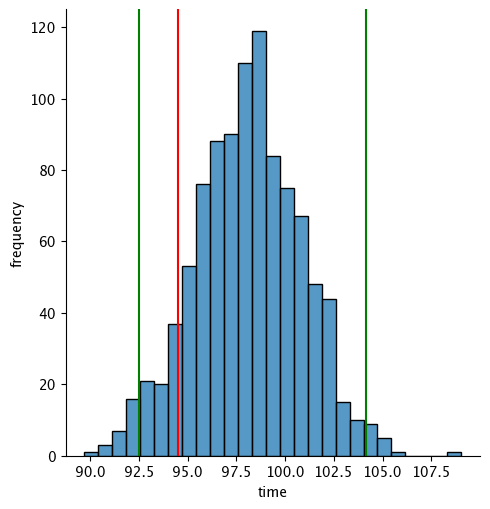

In [16]:
fig = plt.figure()
sns.displot(statDistSample)
plt.axvline(x = statDistSampleCi[0], color = 'g')
plt.axvline(x = statDistSampleCi[1], color = 'g')
plt.axvline(x = meanFTime, color = 'r')
plt.xlabel('time')
plt.ylabel('frequency')

*Figure 3.* The sampling distribution calculated using bootstrap resampling with sample size of 25. The upper and lower bounds of 95% confidence interval are shown in green. The real population mean is shown in red.

### Question 4.3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

> Both the population mean and the time for last year's are included in the confidence interval. Thus there is no statstical evidence from our sample, that the race has gotten faster. 